In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from gym_pycr_ctf.dao.network.emulation_config import EmulationConfig
from gym_pycr_ctf.dao.defender_dynamics.defender_dynamics_model import DefenderDynamicsModel
import gym
import time
import numpy as np
import os
%matplotlib inline

In [7]:
model_path = "/home/kim/storage/workspace/pycr/python-envs/minigames/network_intrusion/ctf/gym-pycr-ctf/examples/difficulty_level_4/hello_world/defender_dynamics_model.json"

In [8]:
defender_dynamics_model = DefenderDynamicsModel()
defender_dynamics_model.read_model_path(model_path)

In [14]:
defender_dynamics_model.normalize()

In [15]:
defender_dynamics_model.norm_num_new_alerts[(85, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=0')].mean()

0.0

In [16]:
defender_dynamics_model.num_new_alerts["19"]

{'172.18.4.191': {'121': 1, '0': 1, '119': 2, '118': 1, '120': 1, '122': 1},
 '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=0': {'109': 1,
  '0': 1,
  '117': 1},
 '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.3_tools=0_backdoor=0_root=1_172.18.4.79_tools=0_backdoor=0_root=1': {'119': 3,
  '121': 1},
 '172.18.4.191_172.18.4.79_tools=0_backdoor=0_root=1': {'119': 2},
 '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=1': {'120': 1},
 '172.18.4.191_172.18.4.3_tools=0_backdoor=0_root=1': {'119': 1}}

In [17]:
defender_dynamics_model.num_new_alerts["19"]["172.18.4.191"]

{'121': 1, '0': 1, '119': 2, '118': 1, '120': 1, '122': 1}

In [18]:
defender_dynamics_model.norm_num_new_alerts[(19,"172.18.4.191")].mean()

102.71428571428571

In [19]:
defender_dynamics_model.norm_num_new_alerts[(19,"172.18.4.191")].rvs()

118

In [20]:
defender_dynamics_model.num_new_alerts["11"]

{'172.18.4.191': {'6': 11, '0': 8, '8': 1},
 '172.18.4.191_172.18.4.79_tools=0_backdoor=0_root=1': {'6': 7, '0': 2},
 '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=1': {'7': 1},
 '172.18.4.191_172.18.4.3_tools=0_backdoor=0_root=1': {'6': 3, '0': 1},
 '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=0': {'6': 1}}

In [25]:
defender_dynamics_model.norm_num_new_alerts[(19,"172.18.4.191")].support()

(0, 122)

In [26]:
dist = defender_dynamics_model.norm_num_new_alerts[(19,"172.18.4.191")]

In [31]:
dist.pmf(122)

0.14285714285714285

In [40]:
xk = np.arange(dist.support()[0], dist.support()[1])

In [41]:
xk

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121])

In [42]:
xk = np.array(list(filter(lambda x: dist.pmf(x) > 0, xk.tolist())))

In [43]:
xk

array([  0, 118, 119, 120, 121])

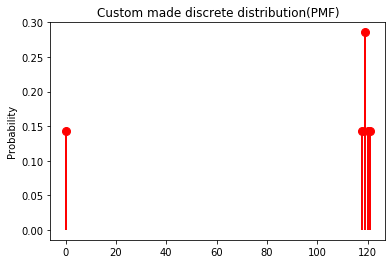

In [44]:
xk = np.arange(dist.support()[0], dist.support()[1])
xk = np.array(list(filter(lambda x: dist.pmf(x) > 0, xk.tolist())))
#pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)
#custm = stats.rv_discrete(name='custm', values=(xk, pk))

fig, ax = plt.subplots(1, 1)
ax.plot(xk, dist.pmf(xk), 'ro', ms=8, mec='r')
ax.vlines(xk, 0, dist.pmf(xk), colors='r', linestyles='-', lw=2)
plt.title('Custom made discrete distribution(PMF)')
plt.ylabel('Probability')
plt.show()

In [48]:
sample = dist.rvs(size=100)

In [49]:
sample

array([121, 120, 118,   0, 118, 119, 118,   0, 119,   0, 119, 118, 119,
       119, 119, 118, 119, 121, 118, 120, 121,   0, 122, 119, 119, 119,
       119, 118, 119, 122, 122, 118, 119, 118, 120, 121, 118, 121, 119,
       121, 119, 119, 118, 119, 122, 120, 118,   0, 122, 119, 118, 119,
       118, 120, 119, 122, 119, 121, 119, 122, 119, 118, 119, 119, 118,
       120,   0, 119, 122,   0,   0, 118, 122, 119,   0, 120, 122,   0,
       120, 120, 120, 119, 120,   0, 121, 120, 121, 121, 118, 122, 121,
         0,   0, 122,   0, 118, 118, 119, 120, 120])

In [54]:
cm = plt.cm.get_cmap('RdYlBu_r')
colors = plt.cm.GnBu(np.linspace(0.3, 1, 4))[-4:]
colors = plt.cm.viridis(np.linspace(0.3, 1, 4))[-4:]

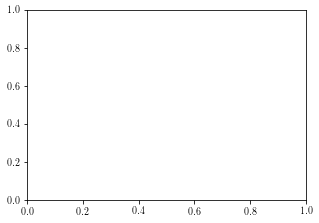

In [67]:
bins = np.linspace(min(sample), max(sample), len(sample) + 1)
digitized_total = np.digitize(sample, bins)

No handles with labels found to put in legend.


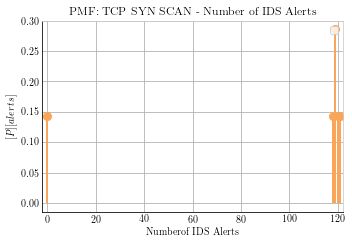

In [82]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')
plt.rcParams['font.family'] = ['serif']
#plt.rcParams['font.serif'] = ['Times New Roman']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5))
plt.rcParams.update({'font.size': 10})
labels = ["test1", "test2"]
title = "PMF: TCP SYN SCAN - Number of IDS Alerts"
xlabel = "Numberof IDS Alerts"

ax.plot(xk, dist.pmf(xk), 'ro', ms=8, mec=colors[0], color=colors[0])
ax.vlines(xk, 0, dist.pmf(xk), colors=colors[0], linestyles='-', lw=2)

ax.set_title(title)
ax.set_xlabel(xlabel, fontsize=20)
ax.set_ylabel(r"$\mathbb[P][alerts]$", fontsize=20)

# set the grid on
ax.grid('on')

# remove tick marks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)

# change the color of the top and right spines to opaque gray
ax.spines['right'].set_color((.8, .8, .8))
ax.spines['top'].set_color((.8, .8, .8))

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()
xlab.set_size(10)
ylab.set_size(10)
#ax.set_xlim((0, 260))
ax.set_xlim((-2, 122))

if len(labels) > 1:
    ax.legend(loc="upper right")

fig.tight_layout()
plt.show()

In [ ]:
dist = defender_dynamics_model.norm_num_new_alerts[(19,"172.18.4.191")]
xk = np.arange(dist.support()[0], dist.support()[1])
xk = np.array(list(filter(lambda x: dist.pmf(x) > 0, xk.tolist())))

In [84]:
str(defender_dynamics_model)

"alerts_dynamics:{'85': {'172.18.4.191': {'0': 22}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.3_tools=0_backdoor=0_root=1_172.18.4.79_tools=0_backdoor=0_root=1': {'0': 4}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=0': {'0': 3}, '172.18.4.191_172.18.4.79_tools=0_backdoor=0_root=1': {'0': 3}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=1': {'0': 8, '1': 1}}, '19': {'172.18.4.191': {'121': 1, '0': 1, '119': 2, '118': 1, '120': 1, '122': 1}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=0': {'109': 1, '0': 1, '117': 1}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.3_tools=0_backdoor=0_root=1_172.18.4.79_tools=0_backdoor=0_root=1': {'119': 3, '121': 1}, '172.18.4.191_172.18.4.79_tools=0_backdoor=0_root=1': {'119': 2}, '172.18.4.191_172.18.4.2_tools=0_backdoor=0_root=0_172.18.4.79_tools=0_backdoor=0_root=1': {'120': 1}, '172.18.4.19

In [ ]:
plt.rc('text', usetex=True)
plt.rc('text.latex', preamble=r'\usepackage{amsfonts}')
plt.rcParams['font.family'] = ['serif']
#plt.rcParams['font.serif'] = ['Times New Roman']
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5, 3.5))
plt.rcParams.update({'font.size': 10})
labels = ["test1", "test2"]
title = "PMF: TCP SYN SCAN - Number of IDS Alerts"
xlabel = "Numberof IDS Alerts"

ax.plot(xk, dist.pmf(xk), 'ro', ms=8, mec=colors[0], color=colors[0])
ax.vlines(xk, 0, dist.pmf(xk), colors=colors[0], linestyles='-', lw=2)

ax.set_title(title)
ax.set_xlabel(xlabel, fontsize=20)
ax.set_ylabel(r"$\mathbb[P][alerts]$", fontsize=20)

# set the grid on
ax.grid('on')

# remove tick marks
ax.xaxis.set_tick_params(size=0)
ax.yaxis.set_tick_params(size=0)

# change the color of the top and right spines to opaque gray
ax.spines['right'].set_color((.8, .8, .8))
ax.spines['top'].set_color((.8, .8, .8))

# tweak the axis labels
xlab = ax.xaxis.get_label()
ylab = ax.yaxis.get_label()
xlab.set_size(10)
ylab.set_size(10)
#ax.set_xlim((0, 260))
ax.set_xlim((-2, 122))

if len(labels) > 1:
    ax.legend(loc="upper right")

fig.tight_layout()
plt.show()